In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import tabulate

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.metrics import accuracy_score , confusion_matrix , precision_score , recall_score , f1_score , classification_report , auc , roc_curve , ConfusionMatrixDisplay ,  roc_auc_score
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.preprocessing import LabelEncoder , RobustScaler , StandardScaler
from sklearn.neural_network import MLPClassifier

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD ,Adam
from tensorflow.keras.utils import plot_model


plt.style.use("fivethirtyeight")
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/creditcardfraud/creditcard.csv
/kaggle/input/classification-test-file/Classification_Test_file.csv


In [ ]:
def 

# **Obtain the Data Set**

In [17]:
creditCard = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")

In [18]:
creditCard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [19]:
creditCard.sample(25)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
238090,149518.0,2.085616,-0.148144,-1.405123,0.256095,0.171377,-0.787750,0.161279,-0.267736,0.652737,...,-0.334171,-0.878842,0.238732,-0.726131,-0.217334,0.242310,-0.077243,-0.065789,16.99,0
112574,72708.0,-0.571602,-0.245217,1.858587,-1.512477,-1.712758,0.135571,-1.058279,0.317034,-1.579767,...,-0.213274,0.116844,-0.059898,-0.116580,-0.321668,-0.147729,0.043734,-0.092689,27.00,0
44236,41856.0,-1.356926,-0.666281,1.859749,0.144472,0.295320,0.723619,-0.558683,-0.756483,-1.091784,...,0.434264,-0.333129,-0.477382,-0.842362,0.471866,-0.039881,0.187895,-0.230607,119.00,0
58856,48582.0,0.798346,-1.334831,-0.539462,-0.645372,-0.525296,-0.058747,0.030423,-0.022298,-1.362016,...,0.454379,0.638671,-0.346492,-0.246718,0.496218,-0.069645,-0.054130,0.030486,282.58,0
234914,148169.0,2.063566,-0.033621,-1.056038,0.416025,-0.130928,-1.215026,0.196233,-0.345854,0.513058,...,-0.287106,-0.681842,0.339898,0.051321,-0.292991,0.194860,-0.069343,-0.059607,0.89,0
22945,32513.0,-2.810752,2.534181,-2.958787,1.108973,0.395948,-1.647285,1.819801,-0.862752,2.630705,...,-0.936264,-0.186686,-0.225725,0.157590,-0.165143,-0.643354,-0.689472,-0.937880,89.99,0
62857,50459.0,1.170564,0.025624,-0.085397,1.087538,0.226796,0.349984,0.049637,0.075461,0.157047,...,-0.134095,-0.319587,-0.279483,-0.823464,0.836832,-0.290728,0.008547,0.003660,47.98,0
254310,156672.0,2.023705,-0.232196,-1.466523,0.159484,0.323739,-0.243766,0.031351,-0.046706,0.423885,...,-0.225387,-0.614137,0.253199,0.348866,-0.180808,0.246191,-0.089469,-0.068633,19.33,0
208613,137196.0,-0.471793,1.232466,-1.818804,-0.127930,3.066913,3.578174,0.463380,1.228199,-0.980182,...,0.151981,0.501319,-0.183792,0.715920,0.104274,-0.354975,0.327714,0.175529,18.21,0
230337,146290.0,1.983554,0.419580,-2.305000,1.382675,0.966835,-0.680793,0.511568,-0.140662,-0.007849,...,0.005475,0.145233,0.011498,0.557708,0.416756,-0.539215,-0.010550,-0.033773,7.82,0


# **Exploring the Data Set**

In [20]:
creditCard.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [21]:
creditCard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [22]:
print(f"The Data Set contain {creditCard.shape[0]} Rows & {creditCard.shape[1]} Columns")
print(f"The Data Set contain {creditCard.duplicated().sum()} record duplicated") # Flag Here
print(f"Number of Nulls in each features :\n{creditCard.isna().sum()}")

The Data Set contain 284807 Rows & 31 Columns
The Data Set contain 1081 record duplicated
Number of Nulls in each features :
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


# **Imbalanced Features Resolving**

In [23]:
X, y = creditCard.drop('Class', axis=1), creditCard['Class']

smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X, y)

X_train, X_val, y_train, y_val = train_test_split( X_resampled_smote, y_resampled_smote, test_size=0.2, random_state=42)

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

testFile = pd.read_csv("/kaggle/input/classification-test-file/Classification_Test_file.csv")
testFile_scaled = scaler.transform(testFile)

# **Modeling Our Data**

## **Neural Networks**

**1st Trial**

* I've Used 3 Hidden Layers with ( 512 , 256 , 128)
* Activation Function in the 3 Hidden Layers **relu**
* Actication Function in the Output Layer **soft max**
* Optimizer : **Adam** with :
   1. learning rate **0.0005**
   2. loss **'sparse_categorical_crossentropy'**
   3. metrics **'accuracy'**
* Number of Epochs **10**
* Batch Size **32**
* f1 score (0.99850)
--------------------------------------------------------------------------------------
**2nd Trial**

* I've Used 3 Hidden Layers with  ( 512 , 256 , 128)
* Activation Function in the 3 Hidden Layers **relu**
* Actication Function in the Output Layer **soft max**
* Optimizer : **Adam** with :
   1. learning rate **0.0005**
   2. loss **'sparse_categorical_crossentropy'**
   3. metrics **'accuracy'**
* Number of Epochs **50**
* Batch Size **32**
* f1 score (1.0000)
--------------------------------------------------------------------------------------
**3rd Trial**

* I've Used 3 Hidden Layers with (256 , 128 , 64)
* Activation Function in the 3 Hidden Layers **relu**
* Actication Function in the Output Layer **soft max**
* Optimizer : **Adam** with :
   1. learning rate **0.0005**
   2. loss **'sparse_categorical_crossentropy'**
   3. metrics **'accuracy'**
* Number of Epochs **10**
* Batch Size **32**
* f1 score (0.99850)
--------------------------------------------------------------------------------------
**4th Trial**

* I've Used 2 Hidden Layers with (256 , 128 , 64)
* Activation Function in the 3 Hidden Layers **relu**
* Actication Function in the Output Layer **soft max**
* Optimizer : **Adam** with :
   1. learning rate **0.0005**
   2. loss **'binary_crossentropy'**
   3. metrics **'accuracy'**
* Number of Epochs **25**
* Batch Size **32**
* f1 score ()

In [63]:
modelAdam = Sequential()
modelAdam.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))  
modelAdam.add(Dense(128,input_dim=X_train ,activation='relu'))
modelAdam.add(Dense(64, activation='relu'))
modelAdam.add(Dense(1, activation='softmax')) 

modelAdam.compile(
    optimizer=Adam(learning_rate=0.0005), 
    loss='binary_crossentropy',  
    metrics=['accuracy']
)
        
history = modelAdam.fit(
    X_train, y_train, 
    validation_data=(X_val, y_val),
    epochs=25, 
    batch_size=32, 
    verbose=1
)

Epoch 1/25


/opt/conda/lib/python3.10/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


14216/14216 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.4991 - loss: 0.0394 - val_accuracy: 0.5010 - val_loss: 0.0110
Epoch 2/25
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.5001 - loss: 0.0052 - val_accuracy: 0.5010 - val_loss: 0.0024
Epoch 3/25
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.5001 - loss: 0.0035 - val_accuracy: 0.5010 - val_loss: 0.0026
Epoch 4/25
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.4993 - loss: 0.0027 - val_accuracy: 0.5010 - val_loss: 0.0029
Epoch 5/25
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.4993 - loss: 0.0022 - val_accuracy: 0.5010 - val_loss: 0.0039
Epoch 6/25
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.4993 - loss: 0.0021 - val_accuracy: 0.5010 - val_loss: 0.0021
Epoch 7/25
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.4999 - loss: 0.0017 - val_accuracy: 0.5010 - val_loss: 0.0019
Epoch 8/25
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.4994 - lo

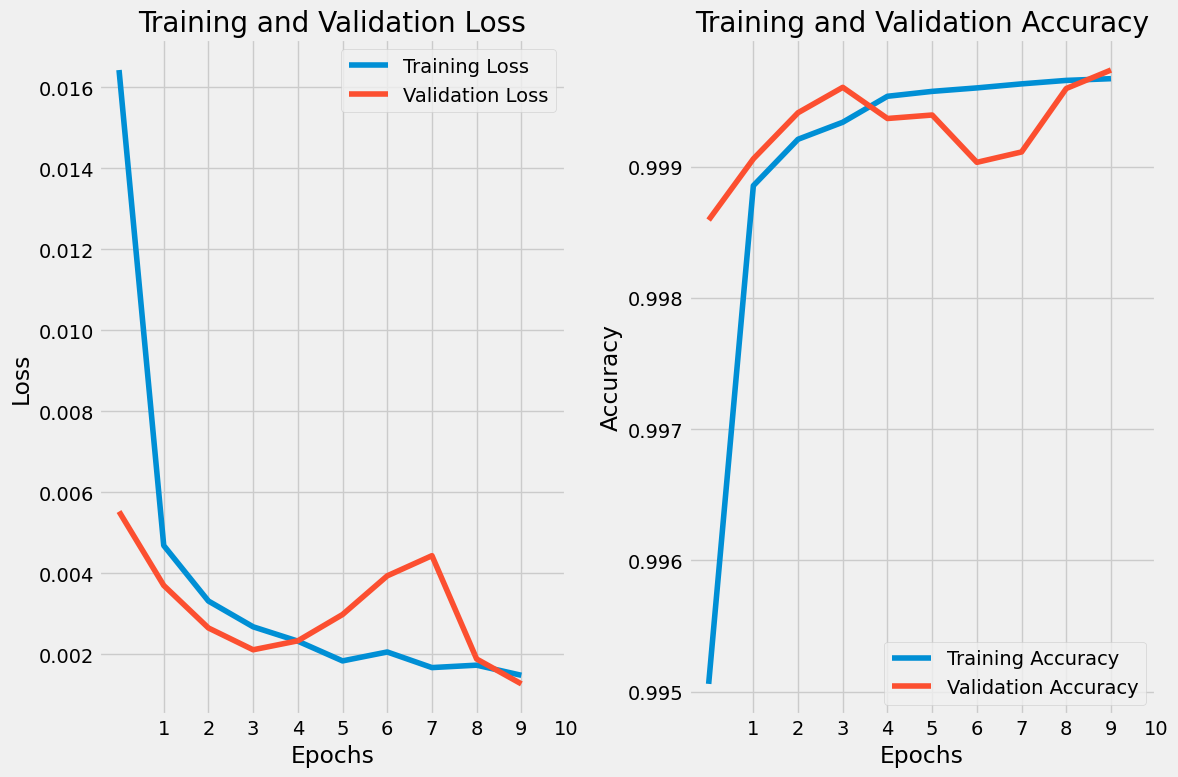

In [53]:
plt.figure(figsize=(12,8))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xticks(range (1 , 11))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xticks(range (1 , 11))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

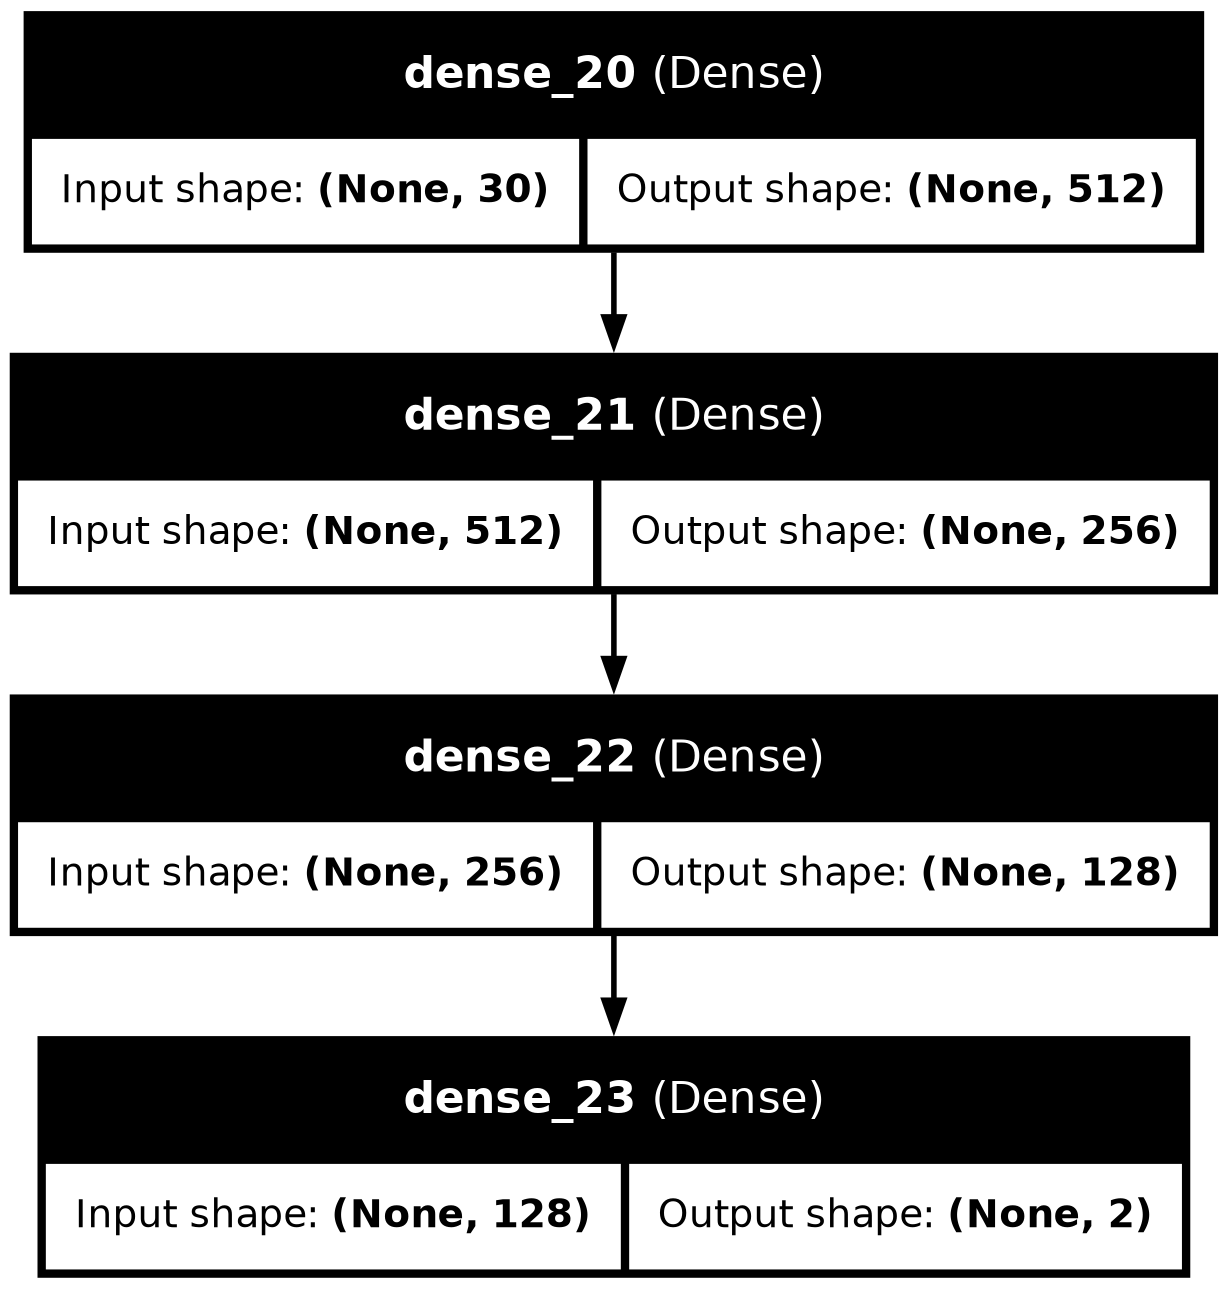

In [40]:
plot_model(modelAdam, to_file='modelAdam.png', show_shapes=True, show_layer_names=True)

In [66]:
y_pred_multiclassAdam = np.argmax(modelAdam.predict(testFile_scaled), axis=1)

dictt = {
    "ID": [i for i in range(len(testFile))],
    "Class": y_pred_multiclassAdam
}
df = pd.DataFrame(dictt)
df.to_csv("Adam_256_128_64 25 ep.csv", index=False)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [65]:
!rm -rf /kaggle/working/*